In [19]:
# from gensim.summarization import keywords
import spacy
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
from spacy.lang.en import English
nlp = English()
nlp.max_length = 10000000
import lyricsgenius
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mahdiraghib/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# df_successful = pd.read_csv('Hot100.csv')
# df_successful['year'] = df_successful['WeekID'].str[:4]
df_unsuccessful = pd.read_csv('UnsuccessfulSong.csv')

df_unsuccessful.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0


In [21]:
df_unsuccessful.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')

In [22]:
df_unsuccessful = df_unsuccessful.dropna(subset=['lyrics'])
df_unsuccessful = df_unsuccessful.reset_index(drop=True)

In [23]:
def get_lyric_sentiment(lyrics): 
	''' 
	Function to return sentiment score of each song
	'''
	analysis = TextBlob(lyrics) 
	return analysis.sentiment.polarity

In [24]:
print(len(df_unsuccessful[df_unsuccessful['track_name'].isin(df_successful['Song'])]))

20


In [25]:
df_unsuccessful = df_unsuccessful[~df_unsuccessful['track_name'].isin(df_successful['Song'])]

print("Number of unique songs: ", len(df_unsuccessful['track_name'].unique()))


Number of unique songs:  23671


In [26]:
sentiment = df_unsuccessful.apply(lambda row: get_lyric_sentiment(row['lyrics']), axis =1)
df_unsuccessful['Sentiment'] = sentiment

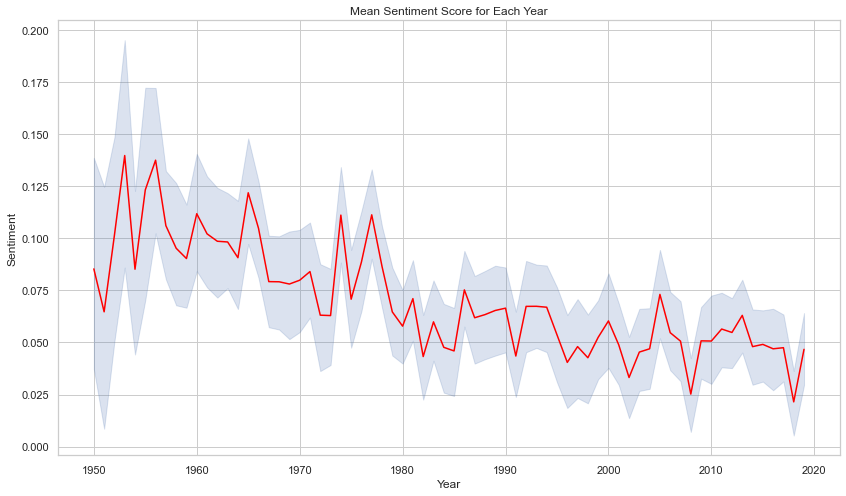

In [27]:
plt.figure(figsize=(14,8))
sns.lineplot(x='release_date', y='Sentiment', data=df_unsuccessful)
plt.title('Mean Sentiment Score for Each Year')

plt.xlabel('Year')
plt.gca().lines[0].set_color('red')

sns.set_theme(style="whitegrid")
plt.grid(True)
plt.show()

In [28]:
def preprocess(text):
    doc = nlp(text, disable=['ner', 'parser'])
    lemmas = [token.lemma_ for token in doc]
    a_lemmas = [lemma for lemma in lemmas 
            if lemma.isalpha() and lemma not in stopwords]
    
    return ' '.join(a_lemmas)

In [29]:
from rake_nltk import Rake

def get_keywords(text):
    retake = Rake()
    retake.extract_keywords_from_text(text)
    keywords = retake.get_ranked_phrases()[:5]
    return keywords

In [30]:
df_unsuccessful['Keywords'] = df_unsuccessful['lyrics'].apply(get_keywords)
df_unsuccessful.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,Sentiment,Keywords
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,...,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,-0.096875,[hold time feel break feel untrue convince spe...
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,...,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,0.450000,[believe drop rain fall grow believe darkest n...
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,...,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,-0.110000,[sweetheart send letter goodbye secret feel be...
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,...,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,0.150000,[kiss lips want stroll charm mambo chacha meri...
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,...,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,0.134091,[till darling till matter know till dream live...


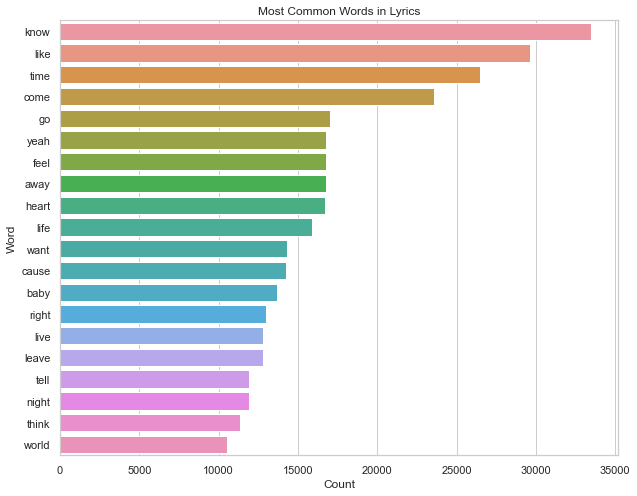

In [35]:
from collections import Counter
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')
df_unsuccessful['lyrics'] = df_unsuccessful['lyrics'].apply(lambda x: tokenizer.tokenize(x.lower()))

df_unsuccessful['lyrics'] = df_unsuccessful['lyrics'].apply(lambda x: [item for item in x if item not in stopwords])

df_unsuccessful['lyrics'] = df_unsuccessful['lyrics'].apply(lambda x: [item for item in x if not item.isdigit()])

most_common_words = Counter([item for sublist in df_unsuccessful['lyrics'] for item in sublist]).most_common(20)
most_common_words

plt.figure(figsize=(10, 8))
sns.barplot(x=[i[1] for i in most_common_words], y=[i[0] for i in most_common_words])
plt.title('Most Common Words in Lyrics')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

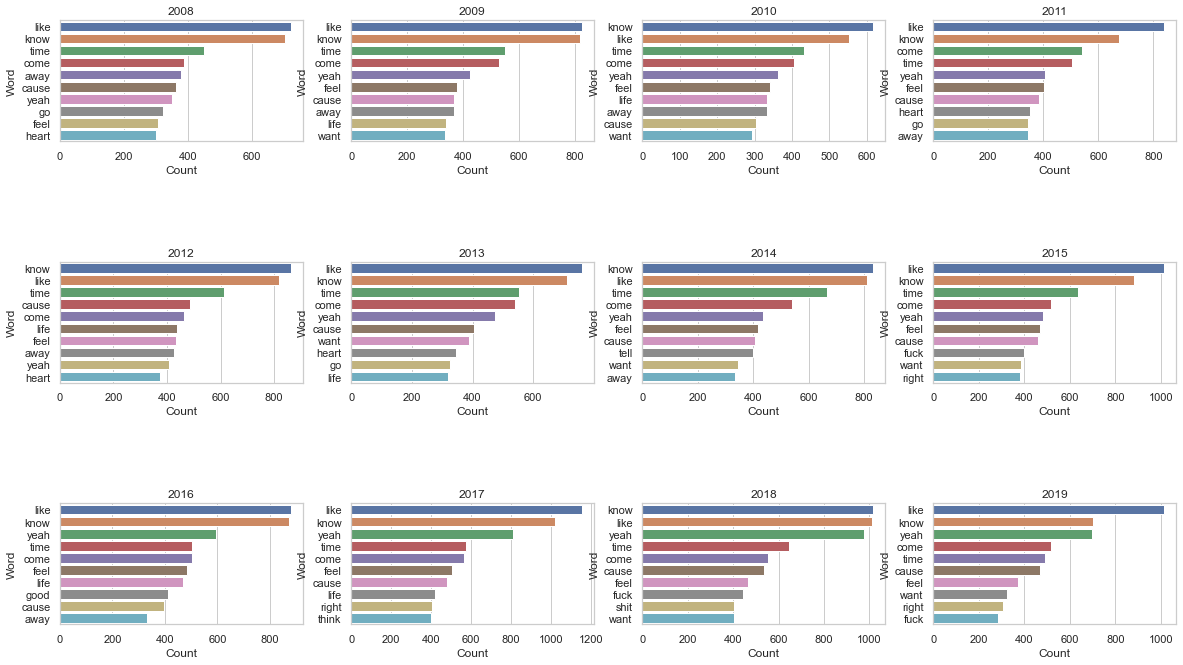

In [37]:
most_common_words_year = df_unsuccessful.groupby('release_date')['lyrics'].apply(lambda x: Counter([item for sublist in x for item in sublist]).most_common(10)).reset_index()
most_common_words_year

plt.figure(figsize=(20, 20))
for i, year in enumerate(most_common_words_year['release_date'].unique()[-12:]):
    plt.subplot(5, 4, i+1)
    sns.barplot(x=[i[1] for i in most_common_words_year[most_common_words_year['release_date']==year]['lyrics'].values[0]], y=[i[0] for i in most_common_words_year[most_common_words_year['release_date']==year]['lyrics'].values[0]])
    plt.title(year)
    plt.xlabel('Count')
    plt.ylabel('Word')
    # space between subplots vertically
    plt.subplots_adjust(hspace=1)
plt.show()

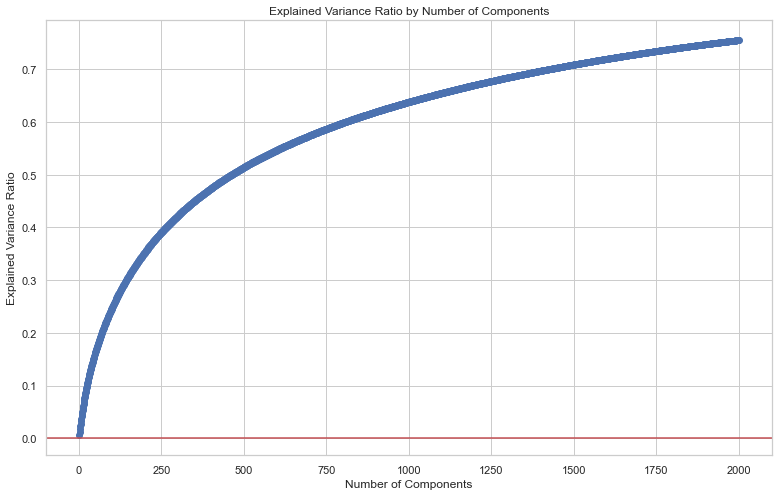

In [39]:
plt.figure(figsize=(13, 8))
svd = TruncatedSVD(n_components=2000)
svd_matrix = svd.fit_transform(tfidf_matrix)
plt.plot(range(1, 2001), svd.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Explained Variance Ratio by Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance Ratio')
plt.axhline(y=0.0, color='r', linestyle='-')

plt.show()